# LED Control Algorithm
_Considering in Junction Temperature_

20180312 by DymaxionKim

In [34]:
# Plotter
using PyPlot
PyPlot.svg(true)

# Cubic Spline Interpolator : https://github.com/kbarbary/Dierckx.jl
using Dierckx

# Curve Fitting : https://github.com/pjabardo/CurveFit.jl
using CurveFit

## Time vs LPD(Light Power Density)

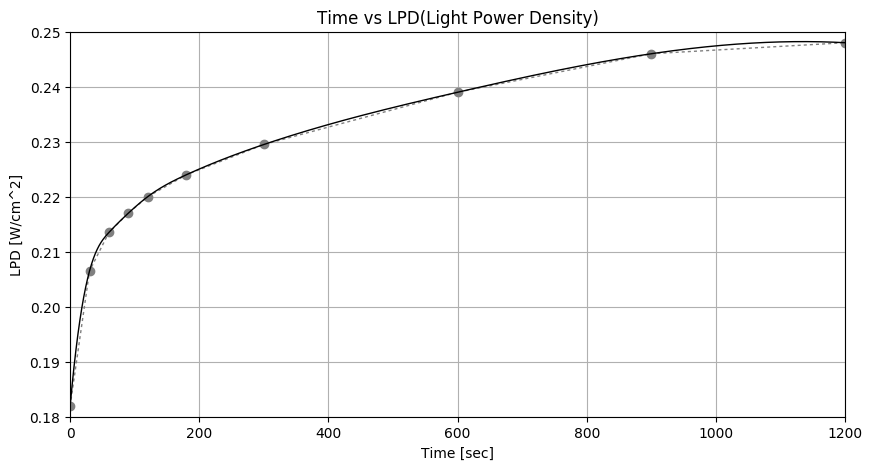

4-element Array{Float64,1}:
    0.0 
 1200.0 
    0.18
    0.25

In [35]:
# Time vs LPD(Light Power Density)
f=figure(figsize=(10,5))
grid("on")
title("Time vs LPD(Light Power Density)")
xlabel("Time [sec]")
ylabel("LPD [W/cm^2]")

x = [0, 30, 60, 90, 120, 180, 300, 600, 900, 1200]; # [sec]
y = [0.182, 0.2065, 0.2135, 0.217, 0.22, 0.224, 0.2295, 0.239, 0.246, 0.248]; # [W/cm^2]
plot(x, y, color="gray", linestyle=":",  marker="o", linewidth=1)

# Interpolation Funcion Name : LPD()
LPD = Spline1D(x,y)
xx = linspace(0,1200,1201)
yy = y[1];
for i = 1:length(xx)-1
    yy = [yy; LPD(i)]
end
plot(xx,yy, color="black", linestyle="-", linewidth=1)
axis([0, 1200, 0.18, 0.25])


## Sensor vs Junction Temperature

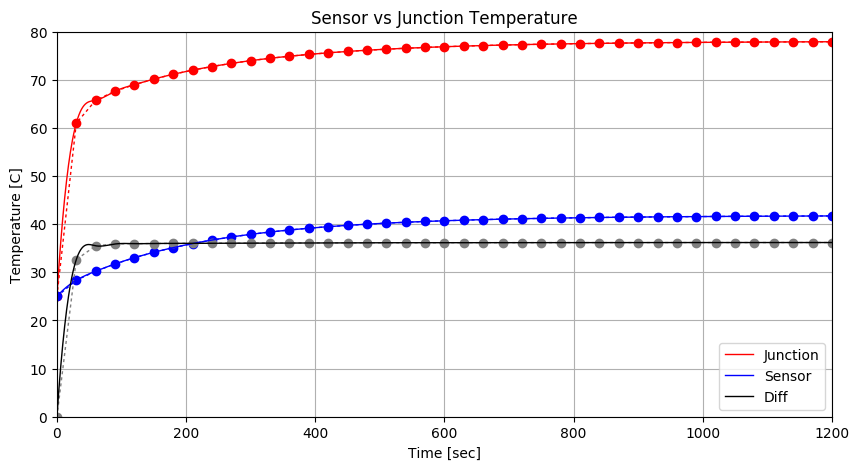

PyObject <matplotlib.legend.Legend object at 0x46d51990>

In [36]:
# Sensor vs Junction Temperature
f=figure(figsize=(10,5))
grid("on")
title("Sensor vs Junction Temperature")
xlabel("Time [sec]")
ylabel("Temperature [C]")

x2 = [0:30:1800;];
y2_Junction = [25.000, 60.998, 65.754, 67.636, 69.004, 70.157, 71.153, 72.017, 72.767, 73.419, 73.987, 74.481, 74.911, 75.287, 75.615, 75.902, 76.153, 76.373, 76.565, 76.735, 76.883, 77.014, 77.129, 77.230, 77.320, 77.399, 77.469, 77.530, 77.585, 77.634, 77.677, 77.715, 77.749, 77.780, 77.807, 77.831, 77.853, 77.872, 77.890, 77.906, 77.920, 77.932, 77.944, 77.954, 77.964, 77.972, 77.980, 77.987, 77.993, 77.999, 78.004, 78.009, 78.014, 78.018, 78.021, 78.025, 78.028, 78.031, 78.034, 78.036, 78.039];
y2_Sensor = [25.000, 28.358, 30.233, 31.745, 33.042, 34.164, 35.136, 35.979, 36.711, 37.347, 37.900, 38.381, 38.801, 39.167, 39.486, 39.765, 40.010, 40.223, 40.411, 40.575, 40.719, 40.846, 40.958, 41.056, 41.143, 41.220, 41.287, 41.347, 41.400, 41.447, 41.489, 41.526, 41.559, 41.588, 41.615, 41.638, 41.659, 41.678, 41.695, 41.710, 41.724, 41.736, 41.747, 41.757, 41.766, 41.774, 41.782, 41.788, 41.795, 41.800, 41.805, 41.810, 41.814, 41.818, 41.822, 41.825, 41.828, 41.831, 41.834, 41.836, 41.838];
y2_Diff = y2_Junction-y2_Sensor;

plot(x2,y2_Junction, color="red", linestyle=":", marker="o", linewidth=1)
plot(x2,y2_Sensor, color="blue", linestyle=":",  marker="o", linewidth=1)
plot(x2,y2_Diff, color="gray", linestyle=":",  marker="o", linewidth=1)

# Interpolation Funcion Name : JUNCTION(), SENSOR(), DIFF()
JUNCTION = Spline1D(x2,y2_Junction)
SENSOR = Spline1D(x2,y2_Sensor)
DIFF = Spline1D(x2,y2_Diff)
xx2 = linspace(0,1800,1801)
yy2_Junction = y2_Junction[1];
yy2_Sensor = y2_Sensor[1];
yy2_Diff = y2_Diff[1];
for i = 1:length(xx2)-1
    yy2_Junction = [yy2_Junction; JUNCTION(i)]
    yy2_Sensor = [yy2_Sensor; SENSOR(i)]
    yy2_Diff = [yy2_Diff; DIFF(i)]
end
plot(xx2,yy2_Junction, label="Junction", color="red", linestyle="-", linewidth=1)
plot(xx2,yy2_Sensor, label="Sensor", color="blue", linestyle="-", linewidth=1)
plot(xx2,yy2_Diff, label="Diff", color="black", linestyle="-", linewidth=1)
axis([0, 1200, 0, 80])
legend()


## Sensor vs LPD

### 데이타 살펴보기
* 일단 앞서 얻어낸 데이타 중에서 실제 시스템에서 직접 측정 가능한 것들을 추출해 본다.
* 센서온도, 광출력밀도

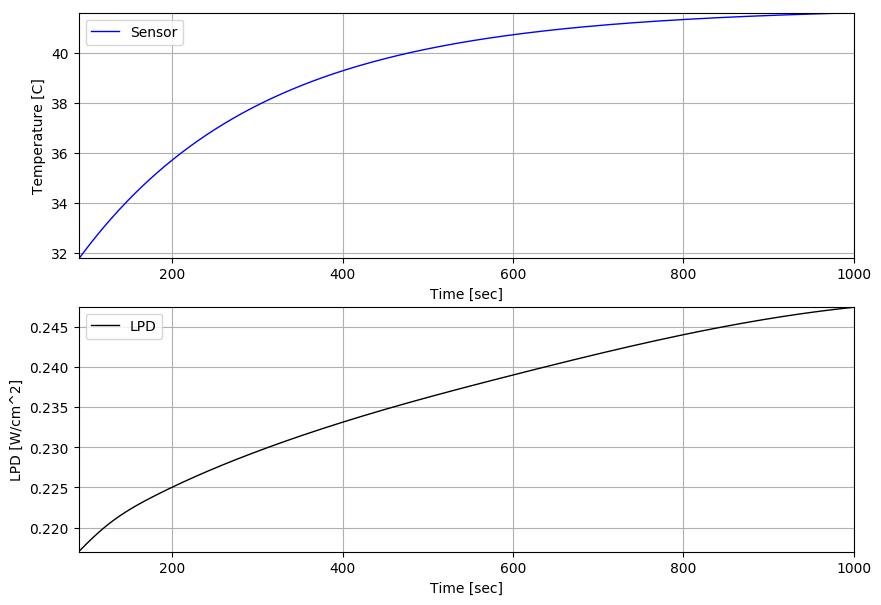

PyObject <matplotlib.legend.Legend object at 0x46b78ab0>

In [37]:
# Sensor vs LPD
f=figure(figsize=(10,7))

subplot(211)
grid("on")
xlabel("Time [sec]")
ylabel("Temperature [C]")
plot(xx2,yy2_Sensor, label="Sensor", color="blue", linestyle="-", linewidth=1)
axis([90, 1000, 31.8, 41.6])
legend()

subplot(212)
grid("on")
xlabel("Time [sec]")
ylabel("LPD [W/cm^2]")
plot(xx,yy, label="LPD", color="black", linestyle="-", linewidth=1)
axis([90, 1000, 0.217, 0.2475])
legend()


### 위 2개의 그래프에서 판단 가능한 사항들
* 광출력밀도는 온도 이외의 다른 파라미터의 영향도 분명히 존재하는 것으로 보인다.
* 그럼에도 불구하고, 그것이 무엇인지 정확히 규명하기가 어렵기 때문에, 다른 파라미터의 영향은 무시하기로 한다.
* 센서온도와 광출력밀도간의 관계는 비선형적으로 나타난다.
* 일단 그래프를 플랏해 보자.

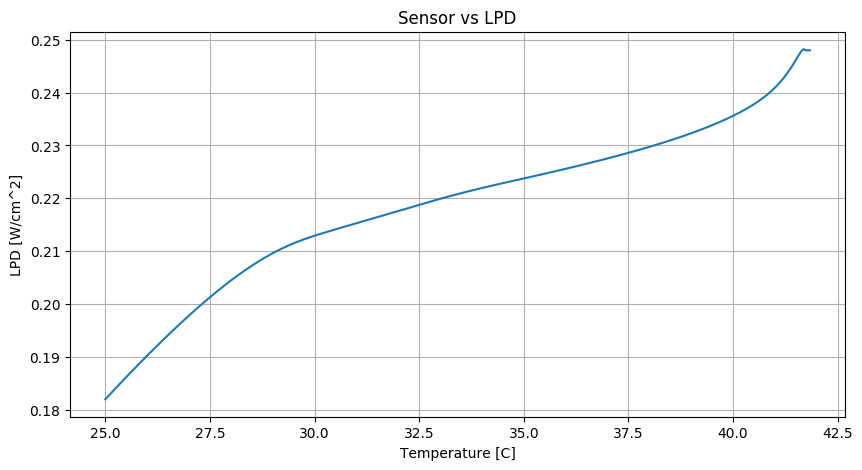

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x4691ea10>

In [38]:
x3 = [0:1:1800;];

x3_Sensor = SENSOR(0);
for i = 1:length(x3)-1
    x3_Sensor = [x3_Sensor; SENSOR(i)]
end

y3_LPD = LPD(0);
for i = 1:length(x3)-1
    y3_LPD = [y3_LPD; LPD(i)]
end

f=figure(figsize=(10,5))
grid("on")
title("Sensor vs LPD")
xlabel("Temperature [C]")
ylabel("LPD [W/cm^2]")
plot(x3_Sensor, y3_LPD)

### Curve Fitting
* 위와 같이, 센서온도와 광출력밀도의 관계식를 그려보면 약간의 비선형적인 비례관계를 볼 수 있다.
* 이것을 1차 직선 커브피팅으로 근사화해 본다.
* (어차피 실제 하드웨어에서의 해상도가 낮고 정수화된 데이타로 취급해야 하기 때문에 고정밀 데이타까지는 필요 없으므로, 1차 선형 피팅만으로도 충분하다)

In [39]:
# y = a + b*x
a, b = linear_fit(x3_Sensor, y3_LPD)

2-element Array{Float64,1}:
 0.108461  
 0.00329649

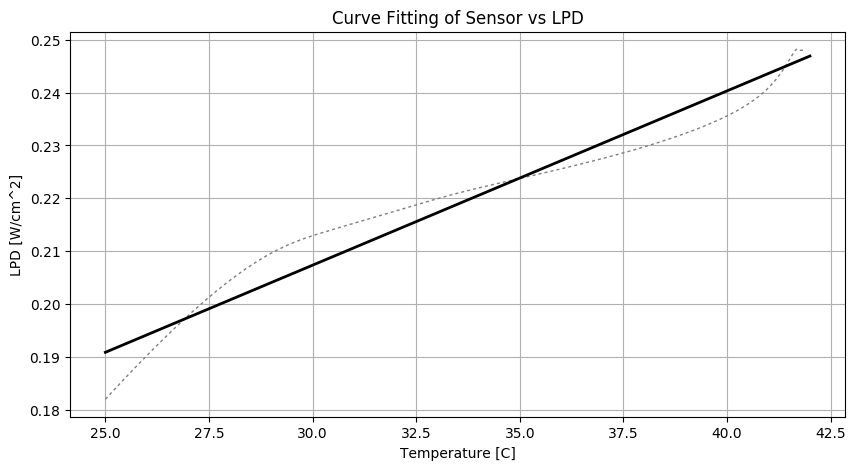

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x467745d0>

In [40]:
x4_Sensor = [25:1:42;];
y4_LPD = a + b*x4_Sensor;

f=figure(figsize=(10,5))
grid("on")
title("Curve Fitting of Sensor vs LPD")
xlabel("Temperature [C]")
ylabel("LPD [W/cm^2]")
plot(x3_Sensor, y3_LPD, label="Raw Data", color="gray", linestyle=":", linewidth=1)
plot(x4_Sensor, y4_LPD, label="Curve Fitting", color="black", linestyle="-", linewidth=2)

## 데이타 단위의 정수화

### 필요성
* 저가형의 8비트 마이크로 프로세서에는 부동소수점 연산 능력이 없다.
* C 라이브러리에서 제공하는 부동소수점 연산 함수를 사용하는 것은 매우 비효율적이다.
* 따라서 취급하는 데이타를 정수화하여 단순 사칙연산만으로 다룰 수 있도록 해 주는 것이 좋겠다.

### 파라미터의 정수화

#### 온도센서값(Sensor)
* 8비트 해상도로 가정한다. (255단계)
* 온도범위는 0~100도씨로 한다.
* 따라서 1단계당 온도차는 $ 100/255 = 0.392156863 [C]$ 가 된다.

$$ TEMPERATURE = INTEGER \left( \frac {SensorTemperature[C]} {0.392156863} \right) $$

#### 광출력밀도(LPD)
* 8비트 해상도로 가정한다. (255단계)
* 출력범위는 0~0.5[W/cm^2]으로 한다.
* 따라서 1단계당 온도차는 $ 0.5/255 = 0.001960784 [W/cm^2] $이 된다.

$$ POWER = INTEGER \left( \frac {LPD[W/cm^2]} {0.001960784} \right) $$

#### 시간(Time)
* 타이머 인터럽트는 1[kHz]으로 가정한다. (0.001[sec])
* 타이머 인터럽트 1회당 1단계 증분시킨다.

$$ TIME = INTEGER \left( \frac {Time[sec]} {0.001} \right) $$

#### 커브피팅 계수
* 상수항 a 계수는 0.108461 이고, 기울기 b 계수는 0.00329649 이다.
* 편의상 10000을 곱하고 소수점이하 자리수는 버린다.
* 따라서 다음과 같이 된다.

$$ A = INTEGER ( 10000 \times a ) = 1085 $$
$$ B = INTEGER ( 10000 \times b ) = 33 $$

### Notations

#### Float

$$ Dose = 0.2 [W/cm^2] \times 900 [sec] = 180 [J/cm^2] $$
$$ a = 0.108461 $$
$$ b = 0.00329649 $$

$$ Dose[J/cm^2] = LPD[W/cm^2] \times Time[sec] $$

$$ Dose[J/cm^2] = \int _0 ^{Time[sec]} { ( a + b \times SensorTemperature[C] ) } $$

#### Integer

$$ DOSE = LONG.INTEGER \left( \frac{0.2[W/cm^2]}{0.001960784} \times \frac{900[sec]}{0.001} \right) = 91800015 $$

$$ A = 1085 $$
$$ B = 33 $$

$$ DOSE = POWER \times TIME $$

$$ DOSE = \int _0 ^{TIME} { ( A + B \times TEMPERATURE ) } $$

### Pseudo Code

In [87]:
DOSE = floor(Int32, (0.2/(0.5/255))*(900/0.001) )
A = floor(Int32, 10000*0.108461)
B = floor(Int32, 10000*0.00329649)

xx4 = linspace(0,1800,1801*1000)
yy4_Sensor = y2_Sensor[1];
for i in length(xx4)
    yy4_Sensor = [yy4_Sensor; SENSOR(i)]
end
TEMPERATURE = floor(Int32, yy4_Sensor/(100/255));

DOSE_INTEGRAL = Int32(0);
TIME = Int32(0);
while DOSE_INTEGRAL <= DOSE
    TIME += 1
    DOSE_INTEGRAL = DOSE_INTEGRAL + (A+B*TEMPERATURE[TIME])
end


LoadError: BoundsError: attempt to access 2-element Array{Int32,1} at index [3]

In [83]:
DOSE_INTEGRAL = Int32(0);
for TIME in length(TEMPERATURE)
    DOSE_INTEGRAL = DOSE_INTEGRAL + (A+B*TEMPERATURE[TIME])
    print("TIME : ", TIME, "\n")
end
print("DOSE_INTEGRAL : ",DOSE_INTEGRAL)

TIME : 1801
DOSE_INTEGRAL : 4476

In [89]:
xx4

1801000-element LinSpace{Float64}:
 0.0,0.000999445,0.00199889,0.00299834,…,1800.0,1800.0,1800.0,1800.0,1800.0